# Forecast

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import m5.config as cfg
from m5.model import train, predict, train_level, predict_level, compile_fcst
from m5.evaluate import accuracy_all_levels, collect_metrics
from m5.plot import plot_fcst

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (14, 4)

## Parameters

In [3]:
level = 12

## Train

In [4]:
params = {
    "task": "train",
    "objective": "tweedie",
    "num_iterations": 300,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "num_threads": 4,
    "early_stopping_round": 20,
}

In [ ]:
train(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FH, params)

Start training
Training model for level 1
Training model for level 1 and step 1
[LightGBM] [Info] Load from binary file /home/ariel/Playground/m5-forecasting/data/processed/datasets/1/1/train.bin
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3652
[LightGBM] [Info] Number of data points in the train set: 1871, number of used features: 25
[LightGBM] [Info] Start training from score 10.442174
[1]	valid_0's tweedie: 825.942
Training until validation scores don't improve for 20 rounds
[2]	valid_0's tweedie: 825.126
[3]	valid_0's tweedie: 824.566
[4]	valid_0's tweedie: 823.965
[5]	valid_0's tweedie: 823.444
[6]	valid_0's tweedie: 822.939
[7]	valid_0's tweedie: 822.539
[8]	valid_0's tweedie: 822.333
[9]	valid_0's tweedie: 822.052
[10]	valid_0's tweedie: 821.821
[11]	valid_0's tweedie: 821.656
[12]	valid_0's tweedie: 821.459
[13]	valid_0's tweedie:

/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[159]	valid_0's tweedie: 819.919
[160]	valid_0's tweedie: 819.919
[161]	valid_0's tweedie: 819.919
Early stopping, best iteration is:
[141]	valid_0's tweedie: 819.914
Training model for level 1 and step 3
[LightGBM] [Info] Load from binary file /home/ariel/Playground/m5-forecasting/data/processed/datasets/1/3/train.bin
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3652
[LightGBM] [Info] Number of data points in the train set: 1869, number of used features: 25
[LightGBM] [Info] Start training from score 10.442132
[1]	valid_0's tweedie: 826.136
Training until validation scores don't improve for 20 rounds
[2]	valid_0's tweedie: 825.455
[3]	valid_0's tweedie: 824.887
[4]	valid_0's tweedie: 824.167
[5]	valid_0's tweedie: 823.672
[6]	valid_0's tweedie: 823.182
[7]	valid_0's tweedie: 822.737
[8]	valid_0's tweedie: 822.428
[9]	valid_0's tweedie: 82

In [ ]:
train_level(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FH, level, params)

## Predict

In [20]:
compile_fcst(cfg.FCST_DIR, cfg.FH)

Compiling forecast level 1
Compiling forecast level 2
Compiling forecast level 3
Compiling forecast level 4
Compiling forecast level 5
Compiling forecast level 6
Compiling forecast level 7
Compiling forecast level 8
Compiling forecast level 9
Compiling forecast level 10
Compiling forecast level 11


In [23]:
accuracy_all_levels(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR)

Calculating accuracy for level 1
Calculating accuracy for level 2
Calculating accuracy for level 3
Calculating accuracy for level 4
Calculating accuracy for level 5
Calculating accuracy for level 6
Calculating accuracy for level 7
Calculating accuracy for level 8
Calculating accuracy for level 9
Calculating accuracy for level 10
Calculating accuracy for level 11


In [26]:
collect_metrics(cfg.METRICS_DIR)

           wmrsse
1        0.390541
2        0.430238
3        0.572372
4        0.455612
5        0.553134
6        0.577809
7        0.667025
8        0.682591
9        0.765033
10       0.861726
11       0.857380
Average  0.619406


In [2]:
predict(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FCST_DIR, cfg.FH)

Start predicting
Making predictions for level 1
Making predictions for level 1 and step 1
Making predictions for level 1 and step 2
Making predictions for level 1 and step 3
Making predictions for level 1 and step 4
Making predictions for level 1 and step 5
Making predictions for level 1 and step 6
Making predictions for level 1 and step 7
Making predictions for level 1 and step 8
Making predictions for level 1 and step 9
Making predictions for level 1 and step 10
Making predictions for level 1 and step 11
Making predictions for level 1 and step 12
Making predictions for level 1 and step 13
Making predictions for level 1 and step 14
Making predictions for level 1 and step 15
Making predictions for level 1 and step 16
Making predictions for level 1 and step 17
Making predictions for level 1 and step 18
Making predictions for level 1 and step 19
Making predictions for level 1 and step 20
Making predictions for level 1 and step 21
Making predictions for level 1 and step 22
Making predicti

In [3]:
# fcst = predict_level(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FCST_DIR, cfg.FH, level)

In [31]:
fcst.iloc[[0]]

,d,sales,fcst
1885,1886,36041,35437.815248


In [64]:
def compile_fcst(fcst_dir, fh):
    for level in range(1, 12 + 1):
        print(f"Compiling forecast level {level}")
        fcst_list = []
        for step in range(1, fh + 1):
            fcst_step = pd.read_parquet(cfg.FCST_DIR / f"{level}/{step}/fcst.parquet")
            fcst_step = fcst_step.iloc[[step-1]]
            fcst_list.append(fcst_step)
        fcst_level = pd.concat(fcst_list, axis=0)
        fcst_level.to_parquet(cfg.FCST_DIR / f"{level}/fcst-{level}.parquet")

In [21]:
AGG_LEVEL

{1: ['d'],
 2: ['state_id', 'd'],
 3: ['store_id', 'd'],
 4: ['cat_id', 'd'],
 5: ['dept_id', 'd'],
 6: ['state_id', 'cat_id', 'd'],
 7: ['state_id', 'dept_id', 'd'],
 8: ['store_id', 'cat_id', 'd'],
 9: ['store_id', 'dept_id', 'd'],
 10: ['item_id', 'd'],
 11: ['item_id', 'state_id', 'd'],
 12: ['item_id', 'store_id', 'd']}

In [28]:
def compile_fcst(fcst_dir, fh):
    for level in range(1, 10 + 1):
        print(f"Compiling forecast level {level}")
        fcst_list = []
        for step in range(1, fh + 1):
            fcst_step = pd.read_parquet(cfg.FCST_DIR / f"{level}/{step}/fcst.parquet")
            if level == 1:
                fcst_step = fcst_step.iloc[[step-1]]
            else:
                fcst_step = fcst_step.groupby(AGG_LEVEL[level][:-1], group_keys=False).apply(lambda df: df.iloc[[step-1]])
            fcst_list.append(fcst_step)
        fcst_level = pd.concat(fcst_list, axis=0).sort_values(by=AGG_LEVEL[level])
        fcst_level.to_parquet(cfg.FCST_DIR / f"{level}/fcst-{level}.parquet")

In [29]:
compile_fcst(cfg.FCST_DIR, cfg.FH)

Compiling forecast level 1
Compiling forecast level 2
Compiling forecast level 3
Compiling forecast level 4
Compiling forecast level 5
Compiling forecast level 6
Compiling forecast level 7
Compiling forecast level 8
Compiling forecast level 9
Compiling forecast level 10


In [66]:
pd.read_parquet(cfg.FCST_DIR / f"{10}/fcst-{10}.parquet")

,item_id,d,sales,fcst
4710258,0,1886,5,6.159899
4713307,0,1887,2,6.357816
4716356,0,1888,3,5.007182
4719405,0,1889,5,5.761373
4722454,0,1890,5,7.632164
...,...,...,...,...
4783433,3048,1909,1,1.304029
4786482,3048,1910,2,1.305409
4789531,3048,1911,1,1.615593
4792580,3048,1912,0,1.944173


In [19]:
pd.read_parquet(cfg.FCST_DIR / f"7/1/fcst.parquet").groupby(["state_id", "dept_id"]).apply(lambda df: df.iloc[[0]])

state_id  dept_id     d  sales         fcst
state_id dept_id                                                   
0        0       39585         0        0  1886   1048  1520.637747
         1       39586         0        1  1886   1885  1750.588601
         2       39587         0        2  1886   6888  7930.980263
         3       39588         0        3  1886   1630  1515.774368
         4       39589         0        4  1886    124   145.030928
         5       39590         0        5  1886   3075  3156.918893
         6       39591         0        6  1886    832   869.108152
1        0       39592         1        0  1886    635   882.288640
         1       39593         1        1  1886   1169  1063.022273
         2       39594         1        2  1886   4781  5094.360063
         3       39595         1        3  1886    824   791.373507
         4       39596         1        4  1886     96   121.325059
         5       39597         1        5  1886   2266  2133.722457
         6       39598         1        6  1886    532   565.777349
2        0       39599         2        0  1886    578   892.802918
         1       39600         2        1  1886   1644  1580.361457
         2       39601         2        2  1886   4657  4848.148361
         3       39602         2        3  1886    777   663.658981
         4       39603         2        4  1886    104    80.128396
         5       39604         2        5  1886   2059  1692.893172
         6       39605         2        6  1886    437   388.254219

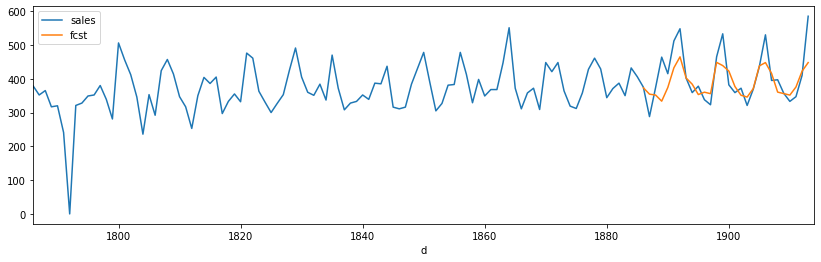

In [19]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, 9, key=(3, 5)) 

In [65]:
compile_fcst(cfg.FCST_DIR, cfg.FH)

Compiling forecast level 1
Compiling forecast level 2
Compiling forecast level 3
Compiling forecast level 4
Compiling forecast level 5
Compiling forecast level 6
Compiling forecast level 7
Compiling forecast level 8
Compiling forecast level 9
Compiling forecast level 10
Compiling forecast level 11
Compiling forecast level 12


FileNotFoundError: [Errno 2] No such file or directory: '/home/ariel/Playground/m5-forecasting/fcst/12/1/fcst.parquet'

In [43]:
fcst = pd.read_parquet(cfg.FCST_DIR / f"{level}/fcst-{level}.parquet")

In [48]:
data = pd.read_parquet(cfg.DATA_DIR / f"processed/levels/level-{level}.parquet")

(1750.0, 1920.0)

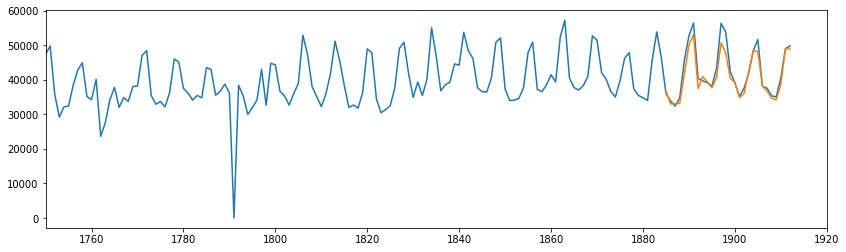

In [59]:
data["sales"].plot()
fcst["fcst"].plot()
plt.xlim(left=1750, right=1920)

In [11]:
fcst_1_1 = pd.read_parquet(cfg.FCST_DIR / "1/1/fcst.parquet")

In [ ]:
fcst_1_1

In [14]:
fcst_1_1.iloc[0]

d         1886.000000
sales    36041.000000
fcst     36752.014194
Name: 1885, dtype: float64

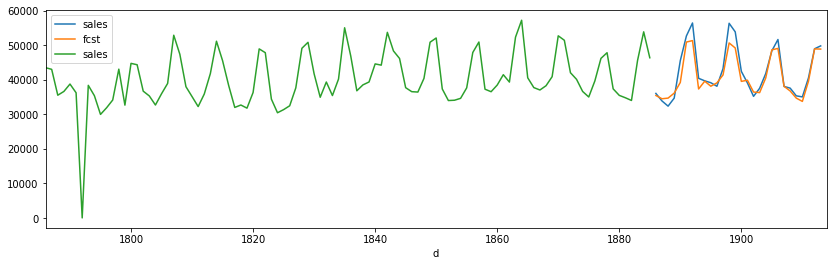

In [58]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=1, step=28)

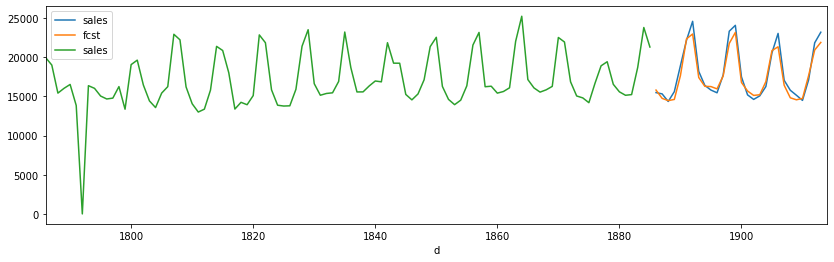

In [9]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=2, step=28)

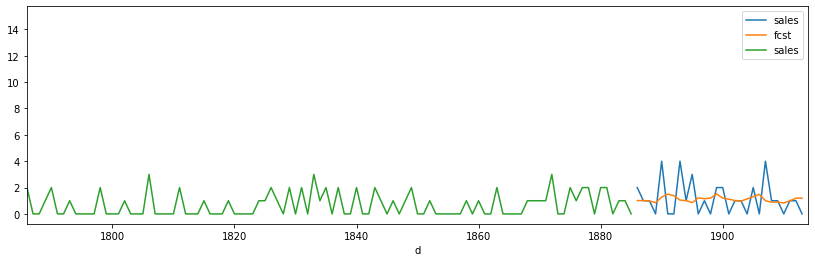

In [8]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=level, step=6)

## Evaluate

In [ ]:
accuracy_df = accuracy(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR, level)
accuracy_df

In [ ]:
accuracy_df["weights"].sum()

In [ ]:
accuracy_df["wrmsse"].sum()

## Misc